In [500]:
import numpy  as np
import pandas as pd

In [501]:
v = pd.read_csv("/content/insurance.csv")

In [502]:
v.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [503]:
v["sex"] = (v["sex"] == "female").astype(int)

# here we are encoding in sex column to convert
# categorical data into numerical data

In [504]:
v.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,0,33.77,1,no,southeast,1725.5523


In [505]:
v["smoker"] = (v["smoker"] == "yes").astype(int)
# we also here have encoded smoker column too


In [506]:
v.sample(2)

,age,sex,bmi,children,smoker,region,charges
1158,20,1,30.59,0,0,northeast,2459.72010
661,57,1,23.98,1,0,southeast,22192.43711


In [507]:
v["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [508]:
# lets encodes  region column
# but here what we is do to apply
# one hot ecoding





In [509]:
region_encoded = pd.get_dummies(v["region"],
                                drop_first=True).astype(int)
v_new = pd.concat([v, region_encoded], axis=1)


In [510]:
v_new

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,1,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,0,1


In [511]:
v_new["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [512]:
v_new = v_new.loc[:, ~v_new.columns.duplicated()]


In [513]:
# v_new
# northwest  southeast  southwest
#    0          0          0   → northeast
#    1          0          0   → northwest
#    0          1          0   → southeast
#    0          0          1   → southwest
# that why in our new dataset north east is missing


In [514]:
v_new = v_new.drop("region", axis=1)

In [515]:
# lets see is there any missing values or not
v_new.isnull().sum()
# no missing values are there

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0
northwest,0
southeast,0
southwest,0


In [516]:
corr = v_new.corr()["charges"]
#  by this observance we can see that smoking has strong
#  correlation to smoker

In [517]:
corr

,charges
age,0.299008
sex,-0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000
northwest,-0.039905
southeast,0.073982
southwest,-0.043210


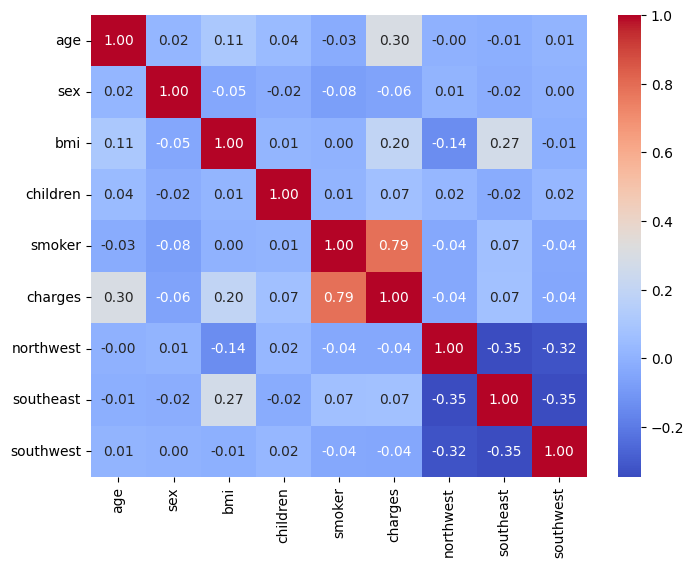

In [518]:
# lets apply heat map
import seaborn as sns
import matplotlib.pyplot as plt

corr = v_new.corr(numeric_only=True)  # NxN matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# by heatmap we can see that smoker , age and bmi playing
# important role  for charges



In [519]:
v.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [520]:
# lets detect outliers ...

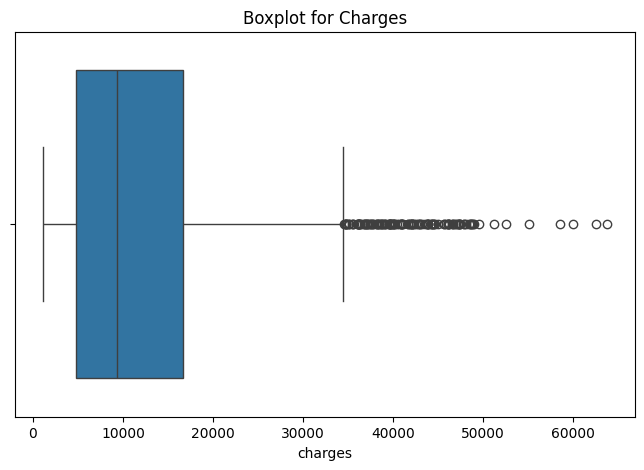

In [521]:

# to check the outliers  in charges
plt.figure(figsize=(8,5))
sns.boxplot(x=v_new["charges"])
plt.title("Boxplot for Charges")
plt.show()


In [522]:
Q1 = v_new["charges"].quantile(0.25)
Q3 = v_new["charges"].quantile(0.75)
IQR = Q3 - Q1

# Outliers define: below Q1-1.5*IQR or above Q3+1.5*IQR
outliers = v_new[(v_new["charges"] < Q1 - 1.5*IQR) | (v_new["charges"] > Q3 + 1.5*IQR)]
print(outliers)


      age  sex     bmi  children  smoker      charges  northwest  southeast  \
14     27    0  42.130         0       1  39611.75770          0          1   
19     30    0  35.300         0       1  36837.46700          0          0   
23     34    1  31.920         1       1  37701.87680          0          0   
29     31    0  36.300         2       1  38711.00000          0          0   
30     22    0  35.600         0       1  35585.57600          0          0   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1300   45    0  30.360         0       1  62592.87309          0          1   
1301   62    0  30.875         3       1  46718.16325          1          0   
1303   43    0  27.800         0       1  37829.72420          0          0   
1313   19    1  34.700         2       1  36397.57600          0          0   
1323   42    1  40.370         2       1  43896.37630          0          1   

      southwest  
14            0  
19            1

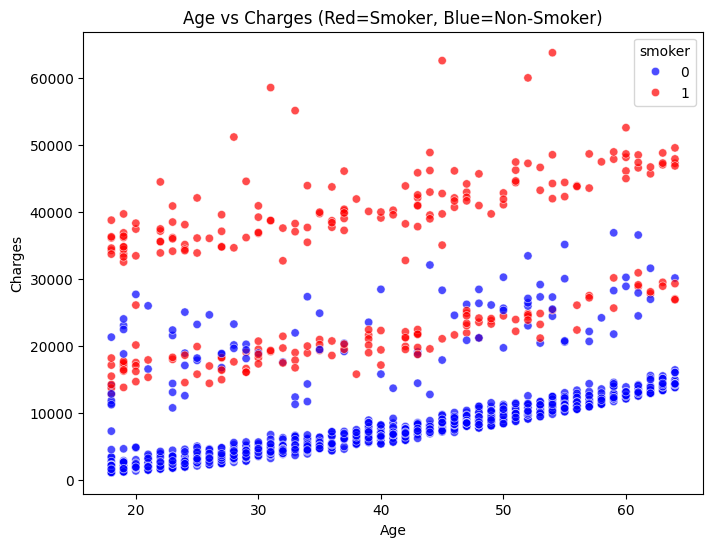

In [523]:
# Scatter plot (BMI vs Charges, Smoker)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=v_new,
    x="age",
    y="charges",
    hue="smoker",   # 0=non-smoker, 1=smoker
    palette={0:"blue",1:"red"},
    alpha=0.7
)
plt.title("Age vs Charges (Red=Smoker, Blue=Non-Smoker)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


/tmp/ipython-input-3862836033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoker", y="charges", data=v_new, palette=["blue","red"])


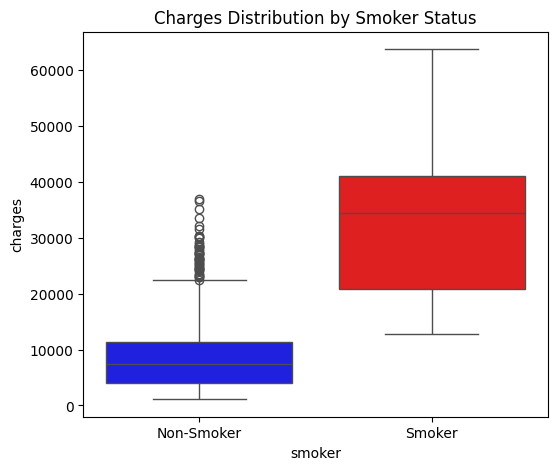

In [524]:

#  Boxplot (Smoker vs Charges)
plt.figure(figsize=(6,5))
sns.boxplot(x="smoker", y="charges", data=v_new, palette=["blue","red"])
plt.xticks([0,1], ["Non-Smoker","Smoker"])
plt.title("Charges Distribution by Smoker Status")
plt.show()


In [525]:
high_charges_smokers = v_new[(v_new['smoker'] == 0) & (v_new['charges'] > 20000)]
print(high_charges_smokers)


      age  sex     bmi  children  smoker      charges  northwest  southeast  \
3      33    0  22.705         0       0  21984.47061          1          0   
9      60    1  25.840         0       0  28923.13692          1          0   
45     55    0  37.300         0       0  20630.28351          0          0   
62     64    0  24.700         1       0  30166.61817          1          0   
102    18    1  30.115         0       0  21344.84670          0          0   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1142   52    1  24.860         0       0  27117.99378          0          1   
1206   59    1  34.800         2       0  36910.60803          0          0   
1211   39    0  34.100         2       0  23563.01618          0          1   
1258   55    0  37.715         3       0  30063.58055          1          0   
1328   23    1  24.225         2       0  22395.74424          0          0   

      southwest  
3             0  
9             0

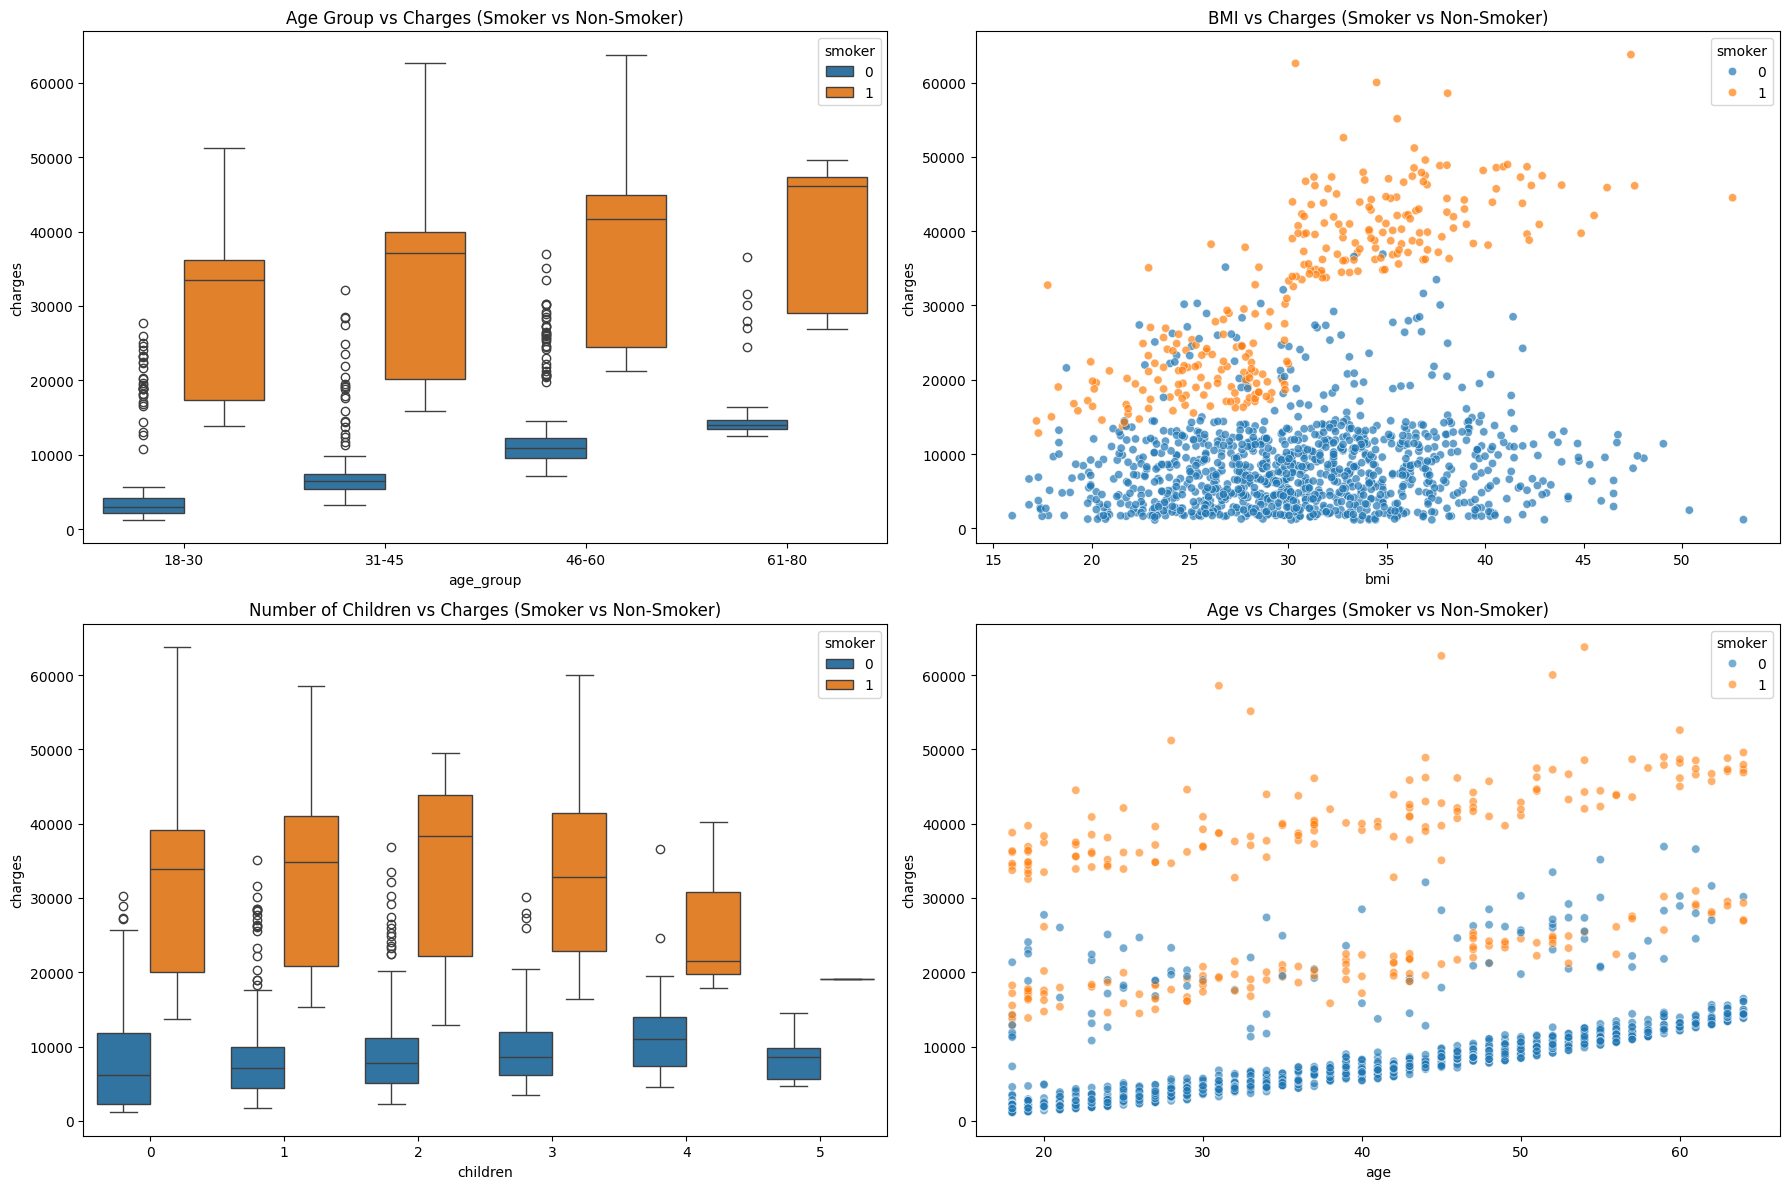

In [526]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age groups create kar lo
v_new['age_group'] = pd.cut(v_new['age'], bins=[18,30,45,60,80], labels=['18-30','31-45','46-60','61-80'])

plt.figure(figsize=(18,12))

# 1️⃣ Age group vs charges
plt.subplot(2,2,1)
sns.boxplot(x='age_group', y='charges', hue='smoker', data=v_new)
plt.title('Age Group vs Charges (Smoker vs Non-Smoker)')

# 2️⃣ BMI vs charges
plt.subplot(2,2,2)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=v_new, alpha=0.7)
plt.title('BMI vs Charges (Smoker vs Non-Smoker)')

# 3️⃣ Children vs charges
plt.subplot(2,2,3)
sns.boxplot(x='children', y='charges', hue='smoker', data=v_new)
plt.title('Number of Children vs Charges (Smoker vs Non-Smoker)')

# 4️⃣ Age vs charges
plt.subplot(2,2,4)
sns.scatterplot(x='age', y='charges', hue='smoker', data=v_new, alpha=0.6)
plt.title('Age vs Charges (Smoker vs Non-Smoker)')

plt.tight_layout()
plt.show()


In [527]:
# here what we are doing is to : finds out the coorelation between
# charges and others columns whoms people does not smokes


# Non-smokers filter
non_smokers = v_new[v_new['smoker'] == 0]

# selecting only numeric columns
numeric_cols = non_smokers.select_dtypes(include='number')

# Correlation
corr = numeric_cols.corr()
print(corr['charges'].sort_values(ascending=False))

# now we can say that by observing this correlation
# that

charges      1.000000
age          0.627947
children     0.138929
bmi          0.084037
sex          0.056320
northwest    0.011806
southeast   -0.039426
southwest   -0.040092
smoker            NaN
Name: charges, dtype: float64


In [528]:
# here what we are doing is to :  finds out the coorelation between
# charges and others columns whoms people  smokes .


# smokers filter
smokers = v_new[v_new['smoker'] == 1]

# Select only numerical colums :
numeric_cols = smokers.select_dtypes(include='number')

# Correlation
corr = numeric_cols.corr()
print(corr['charges'].sort_values(ascending=False))

charges      1.000000
bmi          0.806481
age          0.368224
southeast    0.171069
children     0.035945
southwest    0.009843
northwest   -0.083583
sex         -0.101226
smoker            NaN
Name: charges, dtype: float64


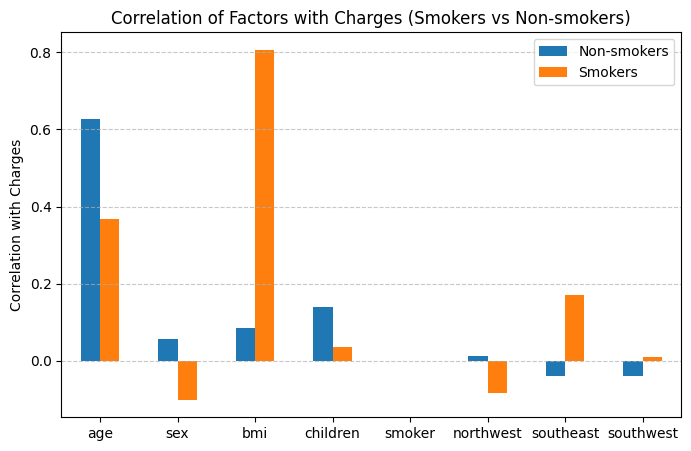

In [529]:
import pandas as pd
import matplotlib.pyplot as plt

# Non-smokers filter
non_smokers = v_new[v_new['smoker'] == 0]
smokers = v_new[v_new['smoker'] == 1]

# Numeric columns only
non_numeric = non_smokers.select_dtypes(include='number')
smoker_numeric = smokers.select_dtypes(include='number')

# Correlation with charges
non_corr = non_numeric.corr()['charges'].drop('charges')
smoker_corr = smoker_numeric.corr()['charges'].drop('charges')

# Combine into a DataFrame
comparison = pd.DataFrame({
    'Non-smokers': non_corr,
    'Smokers': smoker_corr
})

# Plot
comparison.plot(kind='bar', figsize=(8,5))
plt.title("Correlation of Factors with Charges (Smokers vs Non-smokers)")
plt.ylabel("Correlation with Charges")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Non-Smokers and Age: You are absolutely right.
# For people who are non-smokers,
# their medical charges have a strong relationship with age.
# As age increases, their charges also rise.


# Smokers and Age: You are also correct that age
# doesn’t have as big of an effect on the charges for smokers.
# Compared to non-smokers, age plays a much smaller role for them.


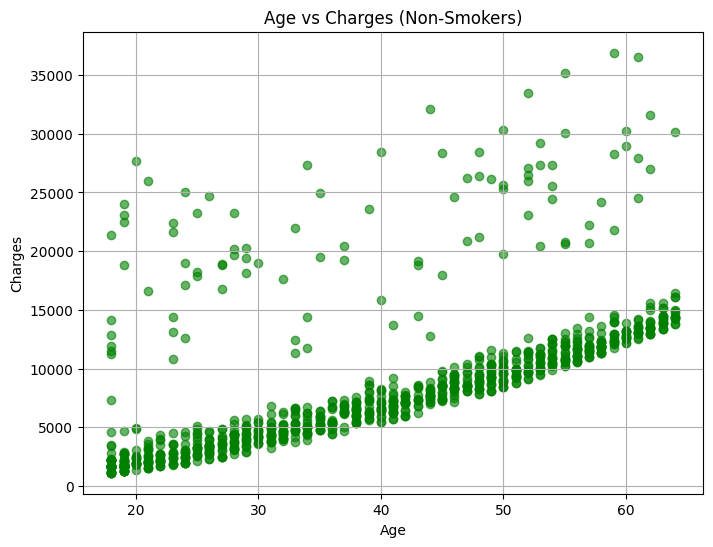

In [530]:
import matplotlib.pyplot as plt

# Non-smokers filter
non_smokers = v_new[v_new['smoker'] == 0]

plt.figure(figsize=(8,6))
plt.scatter(non_smokers['age'], non_smokers['charges'], color='green', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (Non-Smokers)')
plt.grid(True)
plt.show()


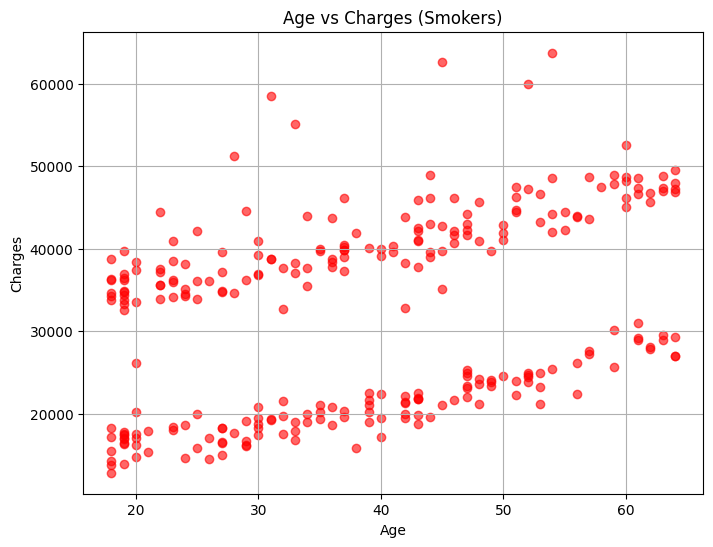

In [531]:
# Smokers filter
smokers = v_new[v_new['smoker'] == 1]

plt.figure(figsize=(8,6))
plt.scatter(smokers['age'], smokers['charges'], color='red', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (Smokers)')
plt.grid(True)
plt.show()


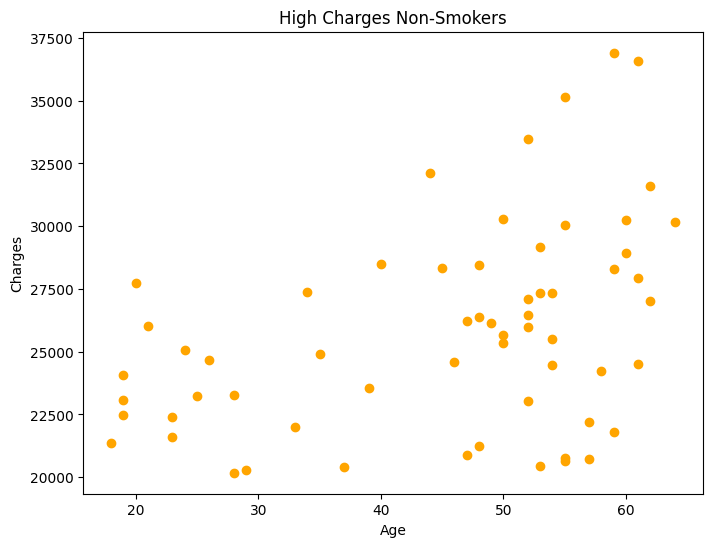

In [532]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(high_charges_smokers['age'], high_charges_smokers['charges'], color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('High Charges Non-Smokers')
plt.show()
# by this scattering plot we can say that as age is increasing
# charges is also increasing


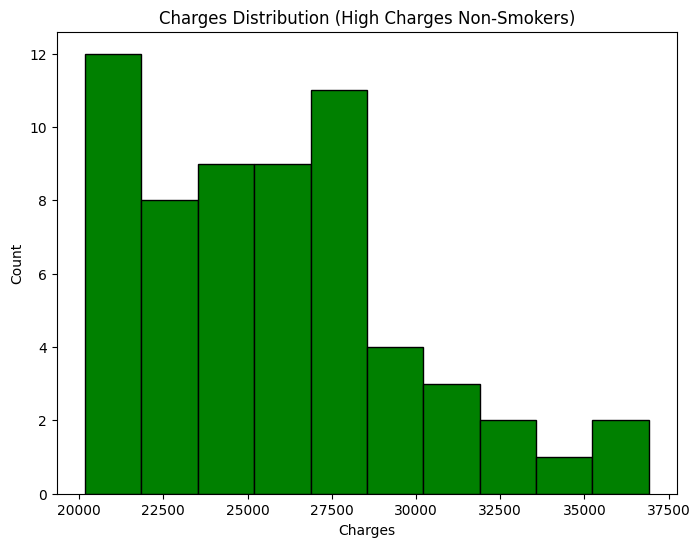

In [533]:
plt.figure(figsize=(8,6))
plt.hist(high_charges_smokers['charges'], bins=10, color='green', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution (High Charges Non-Smokers)')
plt.show()
 # we can see that after  27500 charges are  frequency is lesser

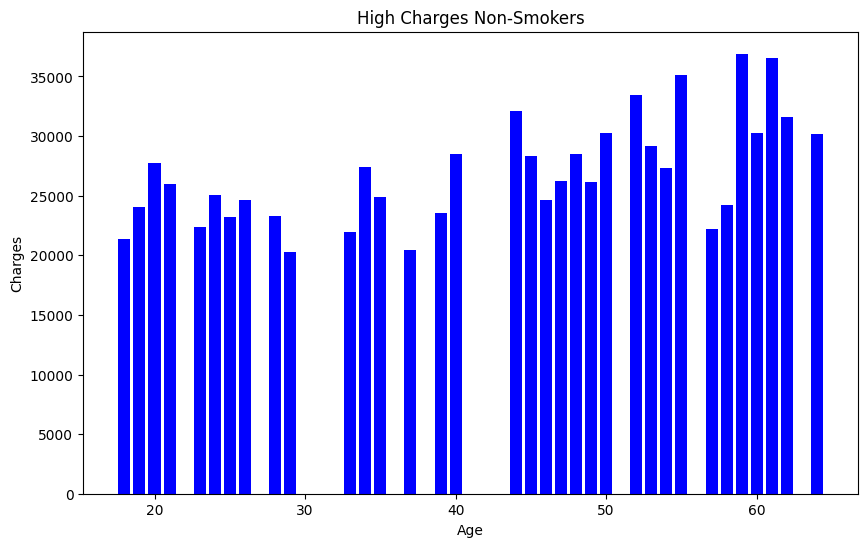

In [534]:
plt.figure(figsize=(10,6))
plt.bar(high_charges_smokers['age'], high_charges_smokers['charges'], color='blue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('High Charges Non-Smokers')
plt.show()
# can say by observing that age does not  play
# crucial role  for increasing the charges ..

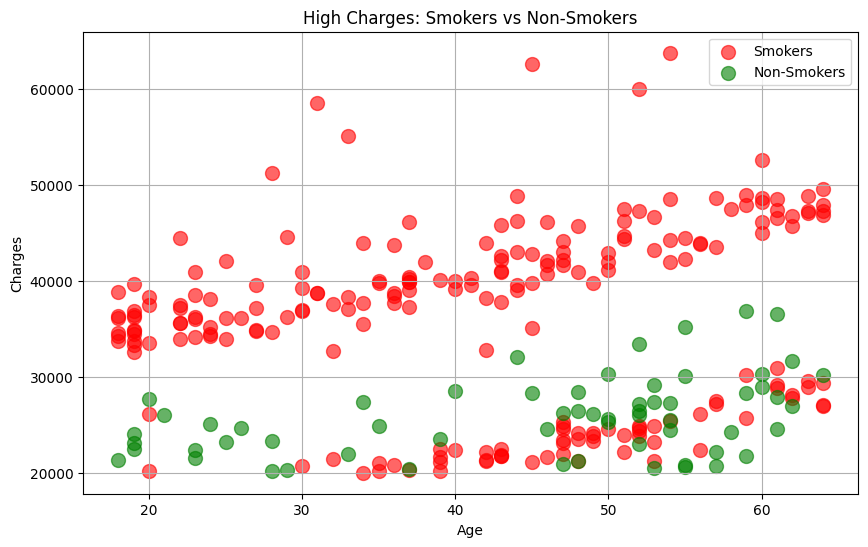

In [535]:
import matplotlib.pyplot as plt

# High charges ke liye filter
high_charges_smokers = v_new[(v_new['smoker'] == 1) & (v_new['charges'] > 20000)]
high_charges_non_smokers = v_new[(v_new['smoker'] == 0) & (v_new['charges'] > 20000)]

plt.figure(figsize=(10,6))

# Scatter plot for smokers
plt.scatter(high_charges_smokers['age'], high_charges_smokers['charges'],
            color='red', label='Smokers', s=100, alpha=0.6)

# Scatter plot for non-smokers
plt.scatter(high_charges_non_smokers['age'], high_charges_non_smokers['charges'],
            color='green', label='Non-Smokers', s=100, alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('High Charges: Smokers vs Non-Smokers')
plt.legend()
plt.grid(True)
plt.show()


**Gonna Train my Model**

In [536]:
# lets drop age_grp not much relevance it have ...
v_new = v_new.drop( ["age_group"] ,  axis =1 )

In [537]:
# lets split our models in inputs and output
x = v_new.drop("charges", axis=1)
y = v_new["charges"]

In [538]:
x.head(1)

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,1,27.9,0,1,0,0,1


In [539]:
y.head(1)

,charges
0,16884.924


**Now Lets Do Train Test Split**

In [1]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

NameError: name 'x' is not defined

In [541]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

In [542]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**lets finds out in which technique model performs best**

In [543]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Linear Regression
lin = LinearRegression().fit(x_train, y_train)
lin_preds = lin.predict(x_test)
print("Linear MSE:", mean_squared_error(y_test, lin_preds))
print("Linear R² score :", r2_score(y_test, lin_preds))
print("")

# Polynomial Regression (degree=2)
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(x_train, y_train)
poly_preds = poly.predict(x_test)
print("Polynomial MSE:", mean_squared_error(y_test, poly_preds))
print("Polynomial R² score :", r2_score(y_test, poly_preds))
print("")

# Ridge Regression
ridge = Ridge(alpha=1.0).fit(x_train, y_train)
ridge_preds = ridge.predict(x_test)
print("Ridge MSE:", mean_squared_error(y_test, ridge_preds))
print("Ridge R² score :", r2_score(y_test, ridge_preds))
print("")

# Lasso Regression
lasso = Lasso(alpha=0.01).fit(x_train, y_train)
lasso_preds = lasso.predict(x_test)
print("Lasso MSE:", mean_squared_error(y_test, lasso_preds))
print("Lasso R² score:", r2_score(y_test, lasso_preds))
print("")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(x_train, y_train)
rf_preds = rf.predict(x_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R² score :", r2_score(y_test, rf_preds))
print("")

# XGBoost
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(x_train, y_train)
xgb_preds = xgbr.predict(x_test)
print("XGBoost MSE:", mean_squared_error(y_test, xgb_preds))
print("XGBoost R² score :", r2_score(y_test, xgb_preds))



Linear MSE: 33596915.851361476
Linear R² score : 0.7835929767120722

Polynomial MSE: 20712805.987918366
Polynomial R² score : 0.8665830903164841

Ridge MSE: 33604973.53996331
Ridge R² score : 0.7835410749121385

Lasso MSE: 33596958.0106119
Lasso R² score: 0.7835927051526848

Random Forest MSE: 20649983.71265638
Random Forest R² score : 0.8669877459594534

XGBoost MSE: 21156412.6436408
XGBoost R² score : 0.8637256972063448


In [544]:

import pandas as pd

# Models and metrics
models = ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost']
mse_values = [
    33596915.851361476,
    20712805.987918377,
    33604973.53996331,
    33596958.01061191,
    20649983.71265638,
    21156412.6436408
]
r2_values = [
    0.7835929767120722,
    0.866583090316484,
    0.7835410749121385,
    0.7835927051526848,
    0.8669877459594534,
    0.8637256972063448
]

# Create DataFrame in same format as metrics_p
metrics_p = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2_Score': r2_values
})

metrics_p

# the matrix of techniques which we
# we are looking are of without hyperparameter
# tune and without removing the outliers



,Model,MSE,R2_Score
0,Linear,3.359692e+07,0.783593
1,Polynomial,2.071281e+07,0.866583
2,Ridge,3.360497e+07,0.783541
3,Lasso,3.359696e+07,0.783593
4,Random Forest,2.064998e+07,0.866988
5,XGBoost,2.115641e+07,0.863726


In [545]:
# lets remove outliers then may we  see the effects


In [546]:
v_copy = v.copy()

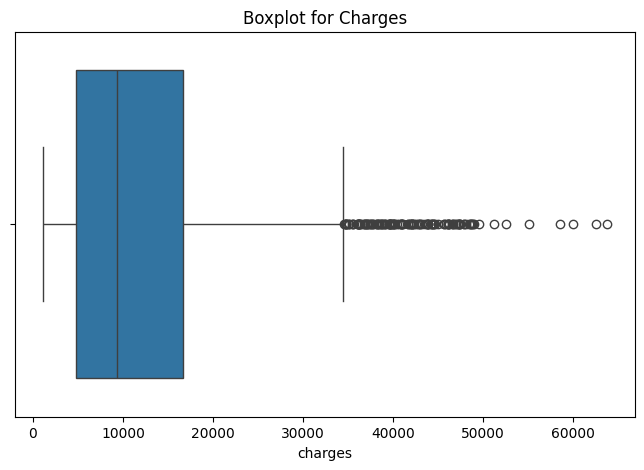

In [547]:

# to check the outliers  in charges
plt.figure(figsize=(8,5))
sns.boxplot(x=v_new["charges"])
plt.title("Boxplot for Charges")
plt.show()


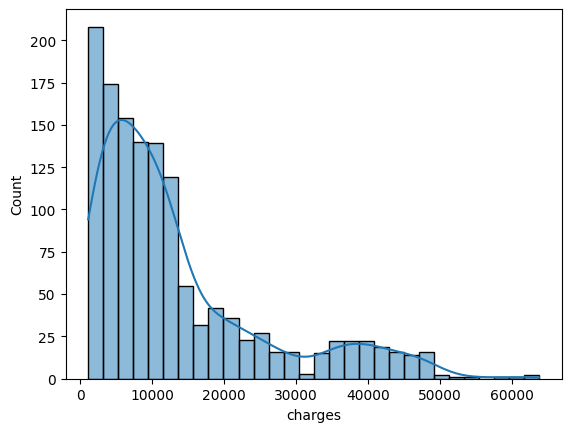

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(v_new["charges"], kde=True)
plt.show()

# can see by this observence taht our charges is rightly skewed
# hence in this case  best approach to handle is to


# methods

# Step 1: First, apply log or square root transformation to reduce skewness.

# Step 2: Then, cap the upper outliers using the IQR method.

# This hybrid approach is generally the most effective in real-world data.

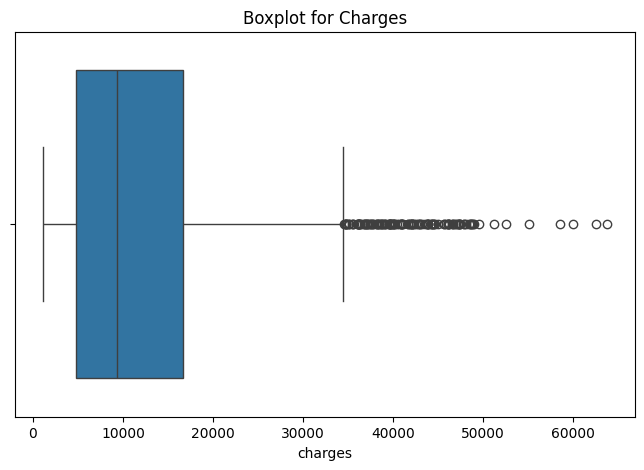

In [549]:
plt.figure(figsize=(8,5))
sns.boxplot(x=v_new["charges"])
plt.title("Boxplot for Charges")
plt.show()


**lets use log transformation to reduce the skewnesss in data**

In [550]:

# Suppose 'column' is your right-skewed column
v_copy['charges_log'] = np.log1p(v_copy['charges'])


In [551]:
Q1 = v_copy['charges_log'].quantile(0.25)
Q3 = v_copy['charges_log'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR


In [552]:
v_copy['charges_capped'] = np.where(v_copy['charges_log'] > upper_limit, upper_limit,
                                np.where(v_copy['charges_log'] < lower_limit, lower_limit, v_copy['charges_log']))


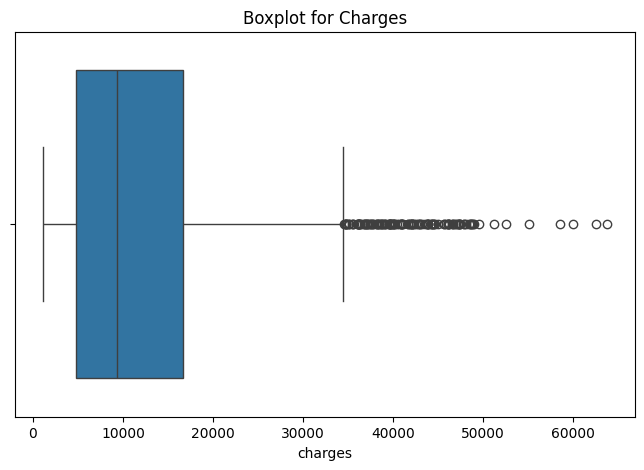

In [553]:
plt.figure(figsize=(8,5))
sns.boxplot(x=v_copy["charges"])
plt.title("Boxplot for Charges")
plt.show()


In [554]:
v_copy

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_capped
0,19,1,27.900,0,1,southwest,16884.92400,9.734236,9.734236
1,18,0,33.770,1,0,southeast,1725.55230,7.453882,7.453882
2,28,0,33.000,3,0,southeast,4449.46200,8.400763,8.400763
3,33,0,22.705,0,0,northwest,21984.47061,9.998137,9.998137
4,32,0,28.880,0,0,northwest,3866.85520,8.260455,8.260455
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,9.268755,9.268755
1334,18,1,31.920,0,0,northeast,2205.98080,7.699381,7.699381
1335,18,1,36.850,0,0,southeast,1629.83350,7.396847,7.396847
1336,21,1,25.800,0,0,southwest,2007.94500,7.605365,7.605365


In [555]:
# Drop unnecessary columns
v_copy = v_copy.drop(columns=['charges_log'])

# Rename capped column to 'charges' for simplicity
v_copy.rename(columns={'charges_capped': 'charges'}, inplace=True)


In [556]:
 v_copy = v_copy.drop(["region"],  axis = 1)

In [557]:
a = v_copy.drop("charges", axis=1)
b = v_copy["charges"]

In [558]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [559]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

In [560]:
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [562]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Linear Regression
lin = LinearRegression().fit(a_train, b_train)
lin_preds = lin.predict(a_test)
print("Linear MSE:", mean_squared_error(b_test, lin_preds))
print("Linear R² score :", r2_score(b_test, lin_preds))
print("")

# Polynomial Regression (degree=2)
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(a_train, b_train)
poly_preds = poly.predict(a_test)
print("Polynomial MSE:", mean_squared_error(b_test, poly_preds))
print("Polynomial R² score :", r2_score(b_test, poly_preds))
print("")

# Ridge Regression
ridge = Ridge(alpha=1.0).fit(a_train, b_train)
ridge_preds = ridge.predict(a_test)
print("Ridge MSE:", mean_squared_error(b_test, ridge_preds))
print("Ridge R² score :", r2_score(b_test, ridge_preds))
print("")

# Lasso Regression
lasso = Lasso(alpha=0.01).fit(a_train, b_train)
lasso_preds = lasso.predict(a_test)
print("Lasso MSE:", mean_squared_error(b_test, lasso_preds))
print("Lasso R² score:", r2_score(b_test, lasso_preds))
print("")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(a_train, b_train)
rf_preds = rf.predict(a_test)
print("Random Forest MSE:", mean_squared_error(b_test, rf_preds))
print("Random Forest R² score :", r2_score(b_test, rf_preds))
print("")


# XGBoost
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Convert b_train to 1D (ravel or squeeze)
xgbr.fit(a_train, b_train.values.ravel())

xgb_preds = xgbr.predict(a_test)
print("XGBoost MSE:", mean_squared_error(b_test, xgb_preds))
print("XGBoost R² score :", r2_score(b_test, xgb_preds))


Linear MSE: 16989628.616061866
Linear R² score : 0.7897057378526631

Polynomial MSE: 10328375.587815803
Polynomial R² score : 0.8638321036284784

Ridge MSE: 16992735.040596604
Ridge R² score : 0.7896655733704057

Lasso MSE: 16989636.724764336
Lasso R² score: 0.7886544391323017

Random Forest MSE: 11039428.142067939
Random Forest R² score : 0.8466394851364973

XGBoost MSE: 10176295.0
XGBoost R² score : 0.8436839580535889


In [563]:
import pandas as pd

# Models and metrics
models = ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost']
mse_values = [
    16989628.616061866,
    10328375.587815803,
    16992735.040596604,
    16989636.724764336,
    11039428.142067939,
    10176295.0
]
r2_values = [
    0.7897057378526631,
    0.8638321036284784,
    0.7896655733704057,
    0.7886544391323017,
    0.8466394851364973,
    0.8436839580535889
]

# Create DataFrame in same format
metrics_new = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2_Score': r2_values
})

metrics_new


,Model,MSE,R2_Score
0,Linear,1.698963e+07,0.789706
1,Polynomial,1.032838e+07,0.863832
2,Ridge,1.699274e+07,0.789666
3,Lasso,1.698964e+07,0.788654
4,Random Forest,1.103943e+07,0.846639
5,XGBoost,1.017630e+07,0.843684
